# MAIN CODE


First 5 rows of the dataset:
   enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size  ... StandardHours  \
0             STEM        >20          NaN  ...           NaN   
1             STEM         15        50-99  ...           NaN   
2             STEM      

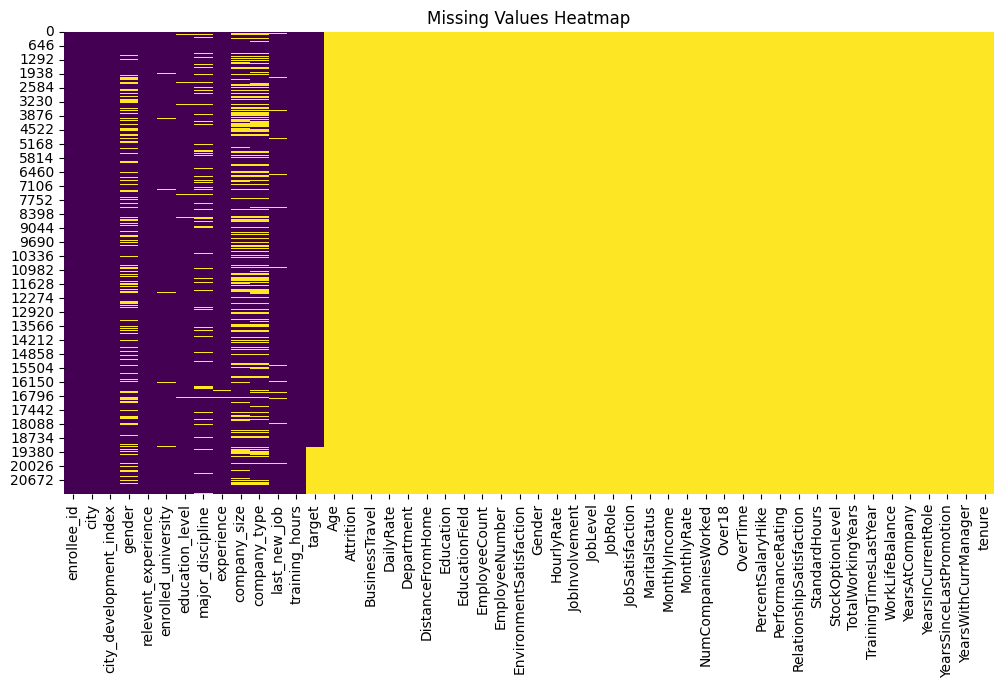


Percentage of missing values in each column:
enrollee_id                   0.000000
city                          0.000000
city_development_index        0.000000
gender                       23.563677
relevent_experience           0.000000
enrolled_university           1.958942
education_level               2.405224
major_discipline             14.680321
experience                    0.328839
company_size                 30.816931
company_type                 31.822239
last_new_job                  2.175036
training_hours                0.000000
target                       10.001409
Age                         100.000000
Attrition                   100.000000
BusinessTravel              100.000000
DailyRate                   100.000000
Department                  100.000000
DistanceFromHome            100.000000
Education                   100.000000
EducationField              100.000000
EmployeeCount               100.000000
EmployeeNumber              100.000000
EnvironmentSatisfa

C:\Users\deepi\AppData\Local\Temp\ipykernel_6928\4049887442.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
C:\Users\deepi\AppData\Local\Temp\ipykernel_6928\4049887442.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

Best parameters found:  {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 200, 'classifier__subsample': 1.0}
Accuracy: 0.7700939457202505
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.84      0.85      2880
         1.0       0.54      0.57      0.55       952

    accuracy                           0.77      3832
   macro avg       0.69      0.70      0.70      3832
weighted avg       0.78      0.77      0.77      3832



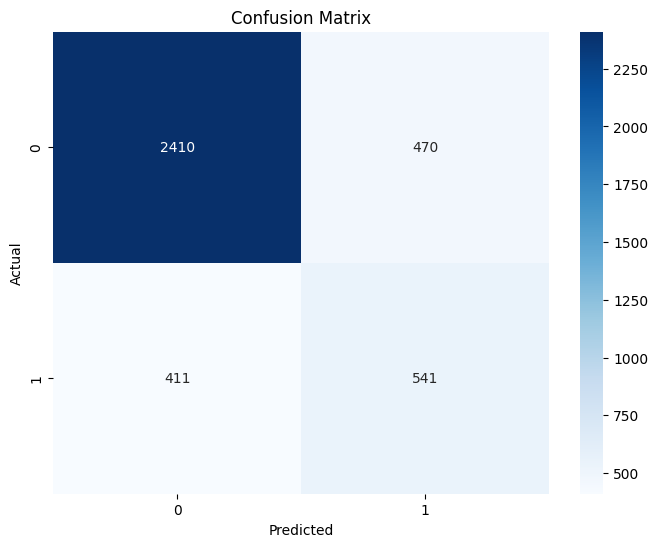

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Load the combined dataset
data = pd.read_csv('Main_Dataset.csv')

# EDA
print("Basic Information about Data")
print(data.info())
print("\nSummary Statistics")
print(data.describe())

# Visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 
                       'company_size', 'company_type', 'city', 'Attrition', 'BusinessTravel', 'Department', 
                       'JobRole', 'MaritalStatus', 'OverTime']

for column in categorical_columns:
    le = LabelEncoder()
    data_imputed[column] = le.fit_transform(data_imputed[column])
    label_encoders[column] = le

# Normalize/Standardize numerical features
scaler = StandardScaler()
numerical_columns = ['city_development_index', 'training_hours', 'Age', 'MonthlyIncome', 'NumCompaniesWorked', 
                     'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 
                     'YearsSinceLastPromotion', 'YearsWithCurrManager']
data_imputed[numerical_columns] = scaler.fit_transform(data_imputed[numerical_columns])

# Split the dataset into training and testing sets
X = data_imputed.drop(columns=['target', 'enrollee_id'])
y = data_imputed['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()
